In [63]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import json
import os

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from numpy.ma import masked_array
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
from functools import reduce


D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sys
sys.path.append("..")
import os

%matplotlib inline

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from fctools import networks, figures

#---- matplotlib settings
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'

import scipy.io as scio
import os

In [4]:
top_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'
parcellations = np.asarray([['network32', 'Network32', 32],
                            ['power', 'Power', 264], 
                            ['schaefer', 'Schaefer', 300]])
data_path = top_dir+'\\'+ parcellations[0][0]+'\\' + parcellations[0][0]

In [4]:
parcellations = np.asarray([['network32', 'Network32', 32,8],
                            ['power', 'Power', 264,8], 
                            ['schaefer', 'Schaefer', 300,8]])

out_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'

parcellation = 'network32'
norm_mean_allegiance = np.load(f'{out_dir}\\{parcellation}\\whole-brain_network_normalized_mean_allegiance_50.npy')

In [5]:
# laod network integration 
brain_net_integration = np.load(f'{out_dir}\\{parcellation}\\brain_net_integration_tr_50.npy')

In [7]:
print(norm_mean_allegiance.shape)
brain_net_integration.shape
# norm_mean_allegiance

(30, 8, 8)


(30, 8)

In [6]:
norm_mean_allegiance.shape
recru_inte = norm_mean_allegiance.reshape(30,-1)
recru_inte_df = pd.DataFrame()
group_labels = ["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15
n_net = int(parcellations[0][3]) 

In [33]:
brain_net_integration[1][0]

0.2927767265846736

In [52]:

# group_labels = np.array(['Stroke']*15 +["Control"]*15)
integration_df = pd.DataFrame() 
for i, sub in enumerate(group_labels):
    temp_df = pd.DataFrame()
    for l, net2 in enumerate(range(n_net)):
#         print(l,net2)

        pre = pd.DataFrame([[str(i), group_labels[i], str(l)+str(l), brain_net_integration[i][l]]], 
                                columns = ['Subject', 'Group', 'Nets', 'Integration'])
        temp_df = pd.concat((temp_df,pre), axis=0)
        k = l+1
        while k < n_net:
#             print(k)
            pre2 = pd.DataFrame([[str(i), group_labels[i], str(l)+str(k), norm_mean_allegiance[i][l][k]]], 
                                   columns = ['Subject', 'Group', 'Nets', 'Integration'])

            temp_df = pd.concat((temp_df,pre2), axis=0)
            k = k+1
#     print(temp_df)
    integration_df = pd.concat((integration_df, temp_df ), axis=0)

In [53]:
integration_df

,Subject,Group,Nets,Integration
0,0,Mild,00,0.337772
0,0,Mild,01,0.845925
0,0,Mild,02,1.259319
0,0,Mild,03,1.000949
0,0,Mild,04,0.945484
...,...,...,...,...
0,29,Control,56,1.729899
0,29,Control,57,1.568657
0,29,Control,66,0.399914
0,29,Control,67,1.271008


In [57]:
import scipy.stats as stats
from bioinfokit.analys import stat

network_in_groupbyfactor = integration_df.groupby('Nets')

brain_network_in_ftest_df ={}
brain_network_in_ftest_df['net'] =[]
brain_network_in_ftest_df['fval'] =[]
brain_network_in_ftest_df['pval'] =[]

brain_network_in_post_2test_df ={}
brain_network_in_post_2test_df ['net'] =[]
brain_network_in_post_2test_df ['mild2severe_stat'] =[]
brain_network_in_post_2test_df ['mild2severe_pval'] =[]
brain_network_in_post_2test_df ['severe2control_stat'] =[]
brain_network_in_post_2test_df ['severe2control_pval'] =[]
brain_network_in_post_2test_df ['mild2control_stat'] =[]
brain_network_in_post_2test_df ['mild2control_pval'] =[]


for factor, group in network_in_groupbyfactor:
#     print(factor,group)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print(control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Integration'],severe['Integration'],control['Integration'])
#     print(fvalue, pvalue)
    brain_network_in_ftest_df['net'].append(factor)
    brain_network_in_ftest_df['fval'].append(fvalue)
    brain_network_in_ftest_df['pval'].append(pvalue)
    
    if pvalue < 0.05:
        brain_network_in_post_2test_df ['net'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Integration",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Integration",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Integration",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        brain_network_in_post_2test_df ['mild2severe_stat'].append(float(t1))
        brain_network_in_post_2test_df ['mild2severe_pval'].append(float(p1))
        brain_network_in_post_2test_df ['severe2control_stat'].append(float(t2))
        brain_network_in_post_2test_df ['severe2control_pval'].append(float(p2))
        brain_network_in_post_2test_df ['mild2control_stat'].append(float(t3))
        brain_network_in_post_2test_df ['mild2control_pval'].append(float(p3))
        
print(brain_network_in_ftest_df)
# print(whole_brain_in_post_2test_df)
# {'sig_roi': ['Salience.AInsula(L)', 'Salience.SMG(L)', 'Salience.SMG(R)', 'Visual.Lateral(L)'],
#  'mild2severe_stat': [-0.705264, -0.721293, -1.07758, -0.2775], 'mild2severe_pval': [0.49309, 0.4835, 0.300813, 0.78576], 
#  'severe2control_stat': [-2.76179, -2.8857, -2.86902, -2.61812], 
#  'severe2control_pval': [0.0113793, 0.0085823, 0.00891635, 0.0157016],
#  'mild2control_stat': [-1.33841, -1.47269, -1.25801, -2.09181],
#  'mild2control_pval': [0.19656, 0.157207, 0.223629, 0.0501202]}



{'net': ['00', '01', '02', '03', '04', '05', '06', '07', '11', '12', '13', '14', '15', '16', '17', '22', '23', '24', '25', '26', '27', '33', '34', '35', '36', '37', '44', '45', '46', '47', '55', '56', '57', '66', '67', '77'], 'fval': [0.23498887422265755, 0.7363731775798377, 0.6994193307258156, 3.2712000474037284, 0.5098691505961359, 0.008590620688727964, 0.5279939165234276, 4.5496433576911, 1.2148911465354881, 0.44881704307841397, 1.2575760164504812, 1.7043337062743318, 0.3394822980520725, 0.35939915153945146, 3.665679378347085, 2.6027049252957317, 0.25489454746639106, 0.02240477209780028, 2.223579733524689, 4.187864426942595, 2.2334162280143404, 2.9143391839343895, 0.760117547750631, 1.638442304141994, 0.32557112364822643, 0.1088891591558571, 1.7824483164460752, 1.2169051599591967, 2.721795626980641, 4.719411011366706, 1.1986172880412989, 2.0229509494205686, 3.457259161504429, 0.812121063807008, 1.4890948015228318, 0.29724836013052885], 'pval': [0.7921796160295835, 0.48821876265935

In [58]:
brain_network_in_post_2test_df

{'net': ['07', '17', '26', '47', '57'],
 'mild2severe_stat': [-0.0564671, -0.525069, 0.284544, 1.05541, 0.753689],
 'mild2severe_pval': [0.955828, 0.608374, 0.780476, 0.310456, 0.464469],
 'severe2control_stat': [2.65284, -3.34529, -2.21325, -2.21786, 2.89885],
 'severe2control_pval': [0.0145339,
  0.00292935,
  0.0375578,
  0.0371991,
  0.00832734],
 'mild2control_stat': [2.32156, -1.48994, -2.20869, -2.75748, 1.26063],
 'mild2control_pval': [0.0315257, 0.152654, 0.0396796, 0.0125301, 0.222703]}

[[0.23498887 0.73637318 0.69941933 3.27120005 0.50986915 0.00859062
  0.52799392 4.54964336]
 [0.73637318 1.21489115 0.44881704 1.25757602 1.70433371 0.3394823
  0.35939915 3.66567938]
 [0.69941933 0.44881704 2.60270493 0.25489455 0.02240477 2.22357973
  4.18786443 2.23341623]
 [3.27120005 1.25757602 0.25489455 2.91433918 0.76011755 1.6384423
  0.32557112 0.10888916]
 [0.50986915 1.70433371 0.02240477 0.76011755 1.78244832 1.21690516
  2.72179563 4.71941101]
 [0.00859062 0.3394823  2.22357973 1.6384423  1.21690516 1.19861729
  2.02295095 3.45725916]
 [0.52799392 0.35939915 4.18786443 0.32557112 2.72179563 2.02295095
  0.81212106 1.4890948 ]
 [4.54964336 3.66567938 2.23341623 0.10888916 4.71941101 3.45725916
  1.4890948  0.29724836]]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: matrix is already symmetric


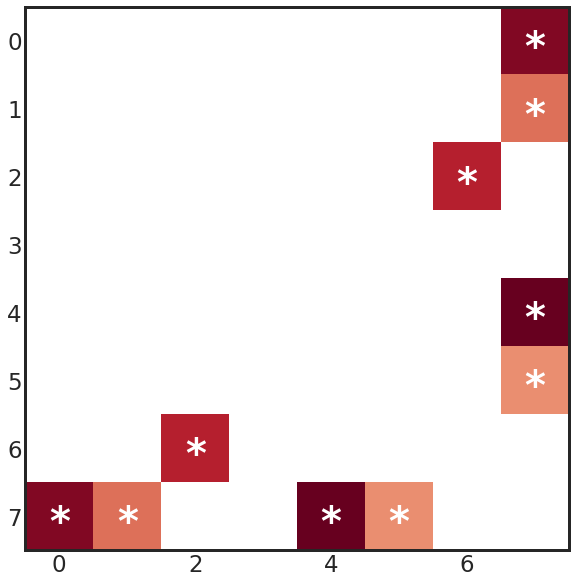

In [101]:
network32_ubique_networks =['DMN', 'SMN', 'VIS', 'SAN','DAN', 'FPN', 'LN','CE']
brain_network_in_ftest_t_m  = return_sys_matrix(brain_network_in_ftest_df['fval'],n_net)
brain_network_in_ftest_p_m  = return_sys_matrix(brain_network_in_ftest_df['pval'],n_net)
print(brain_network_in_ftest_t_m )

matrix_pval_plot(brain_network_in_ftest_p_m, brain_network_in_ftest_t_m, network32_ubique_networks ,
                brain_network_in_ftest_t_m.min(), 
                 brain_network_in_ftest_t_m.max(), 
#                  outpath= f'{data_path}_itegration_signif.png'
                )

In [111]:
def return_sys_matrix(vec,m_len):
    corrected_pval_matrix = np.zeros((m_len,m_len)) 
    k = 0
    for i in range(m_len):
        j = i
        while j< m_len:
#             print(i,j)
            corrected_pval_matrix[i][j] = vec[k]
            k = k+1
            j= j+1
    return corrected_pval_matrix + corrected_pval_matrix.T-np.diag(np.diag(corrected_pval_matrix))


def symmetrize(matrix):
    '''Symmetrizes triangular matrix'''
    from warnings import warn

    if np.allclose(matrix, matrix.T):
        warn('matrix is already symmetric')
        return matrix
    else:
        return matrix + matrix.T - np.diag(np.diag(matrix))

def matrix_pval_plot(pvals, cvals, labels, vmin, vmax, outpath = None, **savefig_kwargs):
    '''Creates matrix plot color coded according to underying p-values. 
    
    Args:
        pvals (array-like): 
            Symmetric matrix of p-values.
        cvals (array-like):
            Corresponding values. These values will actually determine color 
            intensity in heatmap cells.
        labels (list):
            List of labels for both matrix axis. Should have length equal to 
            pvals.shape[0].
        outpath (str)[optional]:
            If specified plot will be saved under path specified in outpath.
        savefig_kwargs (dict)[optional]:
            Optional kwargs passed to fig.savefig() function.
    '''
    # Correct p-values if needed
    pvals_corrected = pvals
    cvals_sig = np.ma.masked_array(symmetrize(cvals), symmetrize(pvals) > .05)

    fig, ax = plt.subplots(facecolor='w')
    plt.tick_params(labelsize=23)
    # Manage labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels,fontsize = 38)
    ax.set_yticklabels(labels,fontsize = 38)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Plot heatmaps
    clim = [-np.max(np.abs(cvals_sig)), np.max(np.abs(cvals_sig))]
    im_sig = ax.imshow(cvals_sig, cmap='RdBu_r', clim=clim, vmin = vmin, vmax = vmax)

#     # Create colorbars
#     cb_sig_axes = fig.add_axes(
#         [ax.get_position().x1 + cbar_offset, ax.get_position().y0,
#          cbar_width, ax.get_position().height])
#     cb_sig = plt.colorbar(im_sig, cax=cb_sig_axes)

    # Annotate significant p-vals (FDR corrected)
    ind_corrected = np.nonzero((pvals_corrected < 0.05) * (pvals_corrected != 0))

    for i, j in zip(*ind_corrected):
        ax.text(j, i + .11, '*', ha="center", va="center", color="w", 
                fontsize= 45, fontweight='bold')
    
    plt.plot()

    if outpath:
#         fig.savefig(outpath, **savefig_kwargs)
        fig.savefig(outpath,bbox_inches='tight', pad_inches=0, dpi=600)
# g.show()


In [81]:
mild2severe_p_m  = np.ones((n_net,n_net))
mild2severe_t_m  = np.ones((n_net,n_net))

severe2control_p_m  = np.ones((n_net,n_net))
severe2control_t_m  = np.ones((n_net,n_net))

mild2control_p_m  = np.ones((n_net,n_net))
mild2control_t_m  = np.ones((n_net,n_net))

sig_roi = brain_network_in_post_2test_df['net']

mild2severe_stat = brain_network_in_post_2test_df['mild2severe_stat'] 
mild2severe_pval = brain_network_in_post_2test_df ['mild2severe_pval'] 
severe2control_stat = brain_network_in_post_2test_df['severe2control_stat']
severe2control_pval = brain_network_in_post_2test_df ['severe2control_pval']
mild2control_stat = brain_network_in_post_2test_df ['mild2control_stat'] 
mild2control_pval = brain_network_in_post_2test_df ['mild2control_pval']


for i,roi in enumerate(sig_roi):
    if len(str(roi)) == 1:
        row = 0
        col = roi
    else:
        row = int(str(roi)[0])
        col = int(str(roi)[1])
#     print(row,col,i)
    mild2severe_p_m[row][col] = mild2severe_pval[i]
    mild2severe_t_m[row][col]  = mild2severe_stat[i]
    mild2severe_p_m[col][row] = mild2severe_pval[i]
    mild2severe_t_m[col][row]  = mild2severe_stat[i]
    
    severe2control_p_m[row][col]  = severe2control_pval[i]
    severe2control_t_m[row][col]  = -severe2control_stat[i]
    severe2control_p_m[col][row]  = severe2control_pval[i]
    severe2control_t_m[col][row]  = -severe2control_stat[i]

    mild2control_p_m[row][col]  = mild2control_pval[i]
    mild2control_t_m[row][col]  = -mild2control_stat[i]
    mild2control_p_m[col][row]  = mild2control_pval[i]
    mild2control_t_m[col][row]  = -mild2control_stat[i]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: matrix is already symmetric
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


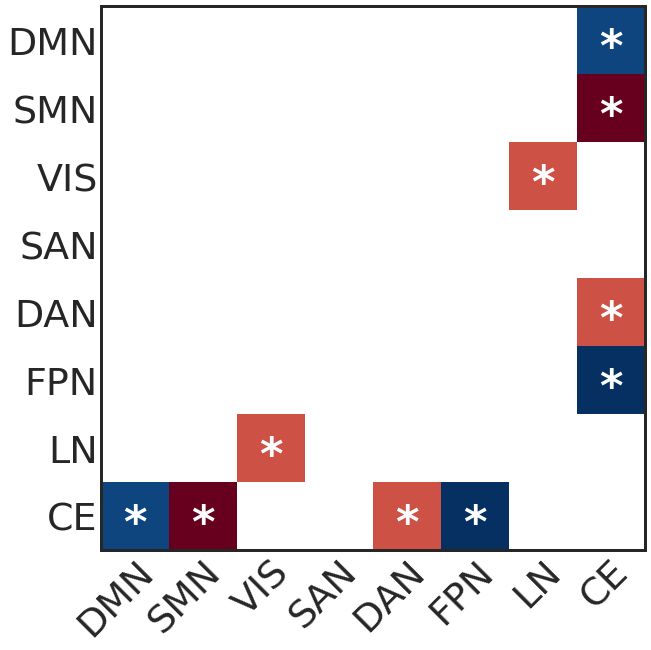

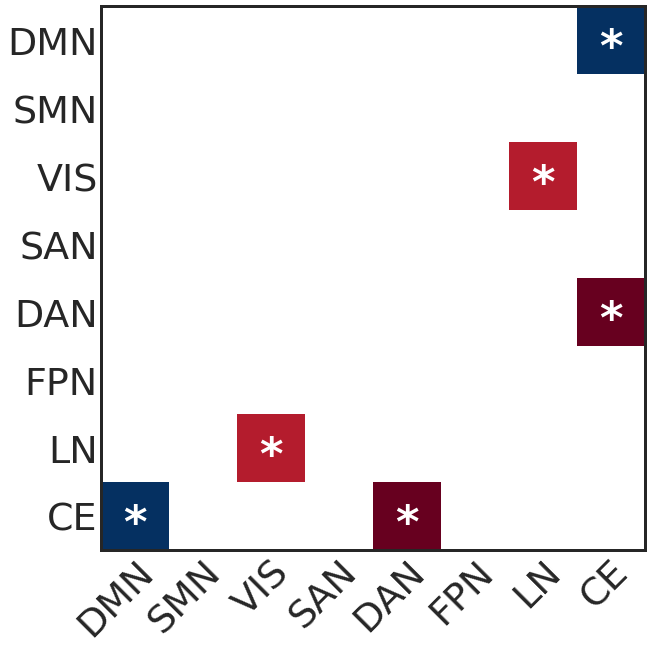

In [112]:
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
plt.rc('legend', fontsize=15) 
plt.rc('figure', figsize=(10, 10))
plt.rc('axes', linewidth=3)

# Colobar settings
cbar_width = 0.03
cbar_offset = 0.02

# Create custom colormap (diverging black - white - black)
col_gray = (.75, .75, .75)
col_white = (1, 1, 1)
newcmp = LinearSegmentedColormap.from_list(
    'gray_div', 
    [col_gray, col_white, col_gray], 
    N=128)

# matrix_pval_plot(mild2severe_p_m, mild2severe_t_m, 
#                   network32_ubique_networks, mild2severe_t_m.min(), 
#                  mild2severe_t_m.max(), 
# #                  outpath=  f'{data_path}_recru_inte_mild2severe_tr_50.png'
#                 )
matrix_pval_plot(severe2control_p_m, severe2control_t_m, 
                  network32_ubique_networks, severe2control_t_m.min(), severe2control_t_m.max(),
                 outpath= f'{data_path}_brain_network_integration_severe2control_tr_50.png'
                )
matrix_pval_plot(mild2control_p_m, mild2control_t_m, 
                  network32_ubique_networks, mild2control_t_m.min(), mild2control_t_m.max(), 
                 outpath= f'{data_path}_brain_network_integration_mild2control_tr_50.png'
                )

In [77]:
data_path

'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\network32\\network32'